In [315]:
#visualizing and analyzing the data
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, f1_score


In [316]:
#importing the dataset which is in the csv file
import pandas as pd
data =pd.read_csv('/content/loan_prediction.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [317]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [318]:
data.dtypes


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [319]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [320]:
print(data.shape)

(614, 13)


*DATA* *PREPROCESSING*

In [321]:
#finding the null values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [322]:
#Code for handlling with Null values
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)


In [323]:
data['Married'].fillna(data['Married'].mode()[0],inplace=True)

In [324]:
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)

In [325]:
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)

In [326]:
data['LoanAmount'].fillna(data['LoanAmount'].mode()[0],inplace=True)

In [327]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)

In [328]:
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)


In [329]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**Label** **Encoding**

In [330]:
#Handling categorical values
data['Gender']=data['Gender'].map({'Female':1,'Male':0})

In [331]:
data['Property_Area']=data['Property_Area'].map({'Urban':2,'Semiurban':1,'Rural':0})

In [332]:
data['Married']=data['Married'].map({'Yes':1,'No':0})

In [333]:
data['Education']=data['Education'].map({'Graduate':1,'Not Graduate':0})

In [334]:
data['Loan_Status']=data['Loan_Status'].map({'Y':1,'N':0})

In [335]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,No,5849,0.0,120.0,360.0,1.0,2,1
1,LP001003,0,1,1,1,No,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,1,0,1,Yes,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,0,1,0,0,No,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,0,0,0,1,No,6000,0.0,141.0,360.0,1.0,2,1


In [336]:
#changing the datatype of each float column to int
data['Gender']=data['Gender'].astype('int64')
data['Married']=data['Married'].astype('int64')

In [337]:
# Remove non-numeric characters and then convert to integer
data['Loan_ID'] = data['Loan_ID'].str.extract('(\d+)').astype('int64')

In [338]:
# Map 'Yes' and 'No' values in the 'Self_Employed' column to 1 and 0
data['Self_Employed'] = data['Self_Employed'].map({'Yes': 1, 'No': 0})

# Now convert the column to integers
data['Self_Employed'] = data['Self_Employed'].astype('int64')

In [339]:
data['CoapplicantIncome']=data['CoapplicantIncome'].astype('int64')
data['LoanAmount']=data['LoanAmount'].astype('int64')
data['Loan_Amount_Term']=data['Loan_Amount_Term'].astype('int64')
data['Credit_History']=data['Credit_History'].astype('int64')
data['Property_Area']=data['Property_Area'].astype('int64')
data['Loan_Status']=data['Loan_Status'].astype('int64')



In [340]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002,0,0,0,1,0,5849,0,120,360,1,2,1
1,1003,0,1,1,1,0,4583,1508,128,360,1,0,0
2,1005,0,1,0,1,1,3000,0,66,360,1,2,1
3,1006,0,1,0,0,0,2583,2358,120,360,1,2,1
4,1008,0,0,0,1,0,6000,0,141,360,1,2,1


In [341]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Loan_ID            614 non-null    int64 
 1   Gender             614 non-null    int64 
 2   Married            614 non-null    int64 
 3   Dependents         614 non-null    object
 4   Education          614 non-null    int64 
 5   Self_Employed      614 non-null    int64 
 6   ApplicantIncome    614 non-null    int64 
 7   CoapplicantIncome  614 non-null    int64 
 8   LoanAmount         614 non-null    int64 
 9   Loan_Amount_Term   614 non-null    int64 
 10  Credit_History     614 non-null    int64 
 11  Property_Area      614 non-null    int64 
 12  Loan_Status        614 non-null    int64 
dtypes: int64(12), object(1)
memory usage: 62.5+ KB


DECTECTING OUTLIERS USING BOXPLOT

In [342]:
import seaborn as sns
import matplotlib.pyplot as plt

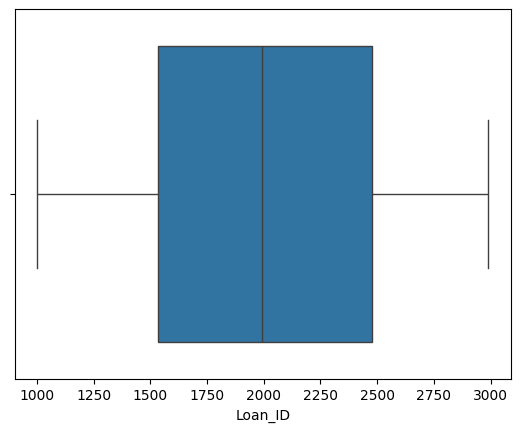

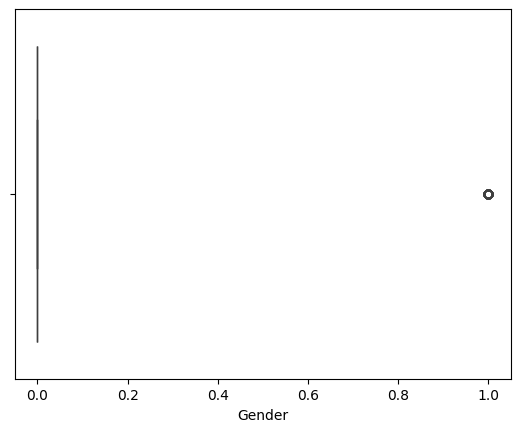

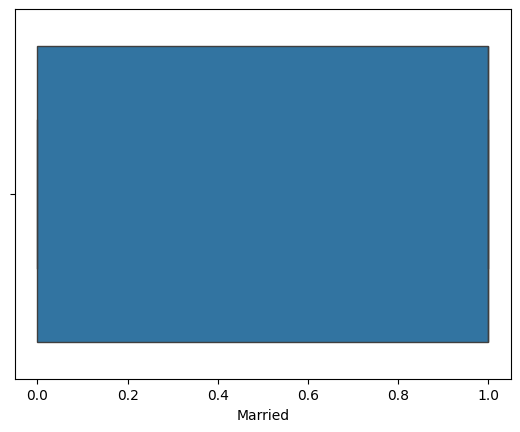

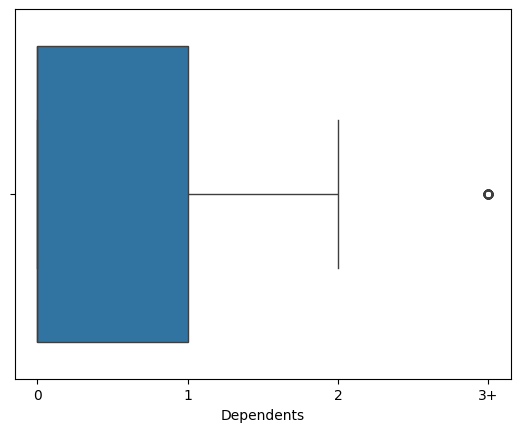

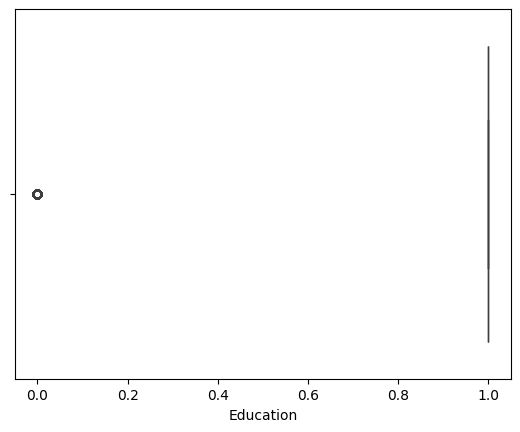

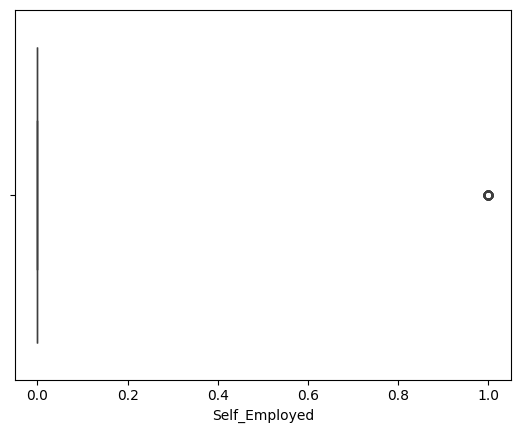

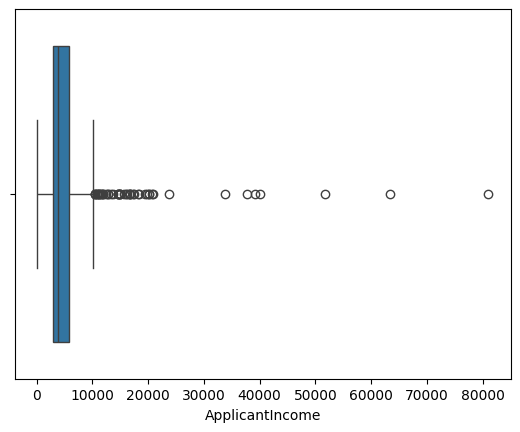

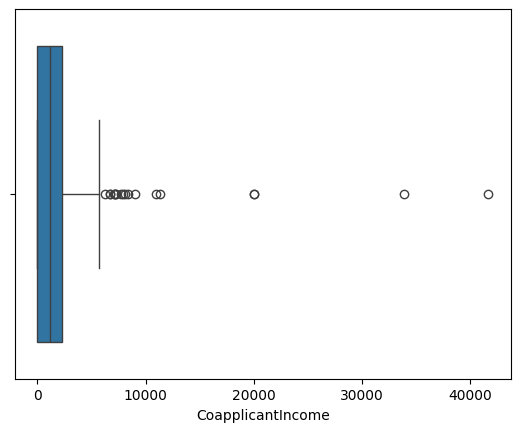

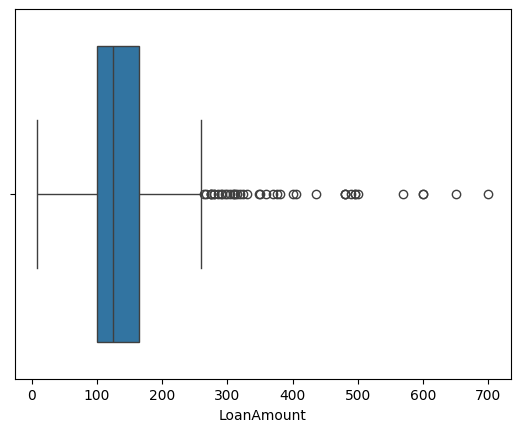

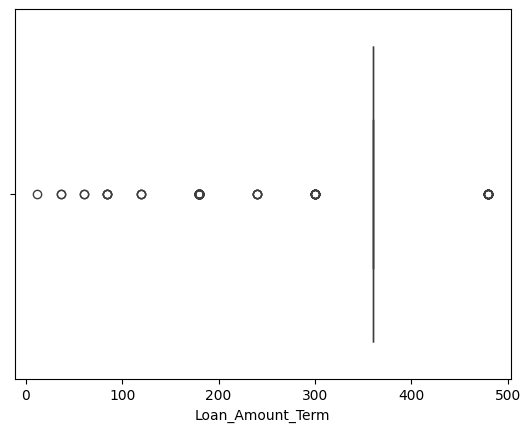

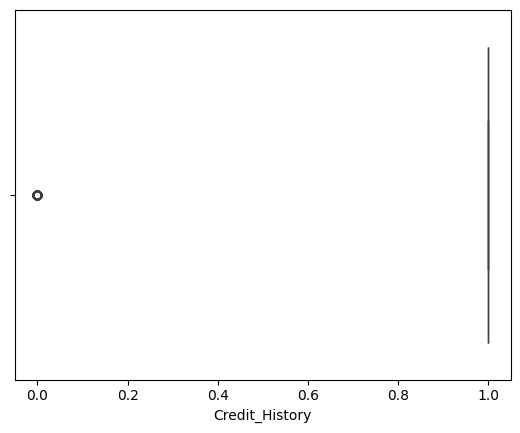

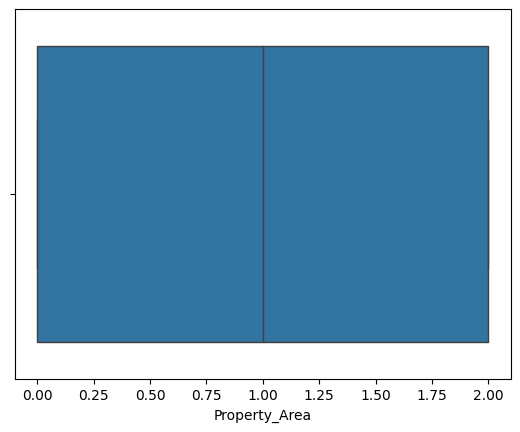

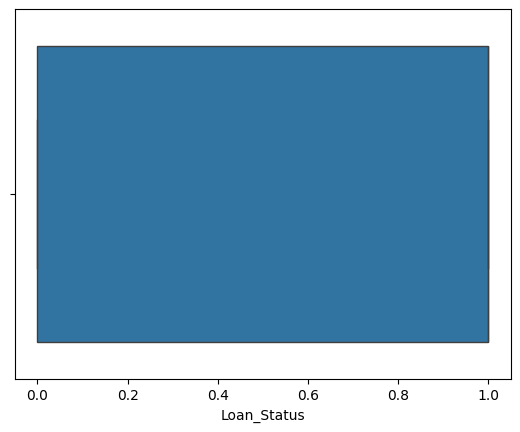

In [343]:
def func(col):
  sns.boxplot(x=col,data=data)
  plt.show()
for i in data.columns:
  func(i)

In [344]:
IQR = data['Gender'].quantile(0.75)-data['Gender'].quantile(0.25)
IQR

0.0

In [345]:
lowerBound=data['Gender'].quantile(0.25)-(1.5*IQR)
lowerBound

0.0

In [346]:
upperBound=data['Gender'].quantile(0.75)+(1.5*IQR)
upperBound

0.0

In [347]:
data['Gender']=np.where(data['Gender']>upperBound,upperBound,data['Gender'])
data['Gender']=np.where(data['Gender']<lowerBound,lowerBound,data['Gender'])

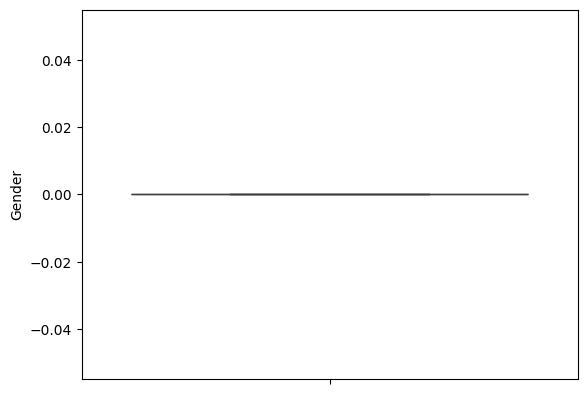

In [348]:
sns.boxplot(data['Gender'])
plt.show()

In [349]:
IQR = data['Education'].quantile(0.75)-data['Education'].quantile(0.25)
IQR

0.0

In [350]:
lowerBound=data['Education'].quantile(0.25)-(1.5*IQR)
lowerBound

1.0

In [351]:
upperBound=data['Education'].quantile(0.75)+(1.5*IQR)
upperBound

1.0

In [352]:
data['Education']=np.where(data['Education']>upperBound,upperBound,data['Education'])
data['Education']=np.where(data['Education']<lowerBound,lowerBound,data['Education'])

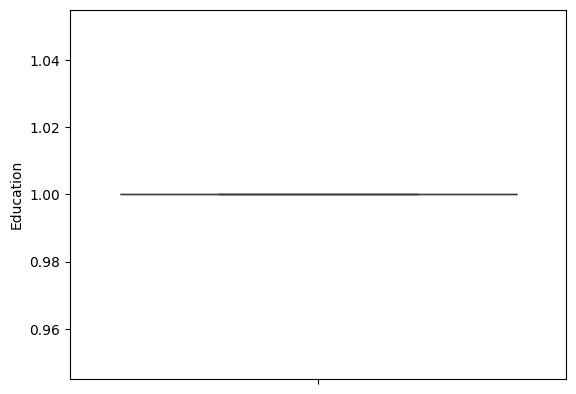

In [353]:
sns.boxplot(data['Education'])
plt.show()

In [354]:
IQR = data['Self_Employed'].quantile(0.75) - data['Self_Employed'].quantile(0.25)
IQR

0.0

In [355]:
lowerBound=data['Self_Employed'].quantile(0.25)-(1.5*IQR)
lowerBound

0.0

In [356]:
upperBound=data['Self_Employed'].quantile(0.75)+(1.5*IQR)
upperBound

0.0

In [357]:
data['Self_Employed']=np.where(data['Self_Employed']>upperBound,upperBound,data['Self_Employed'])
data['Self_Employed']=np.where(data['Self_Employed']<lowerBound,lowerBound,data['Self_Employed'])

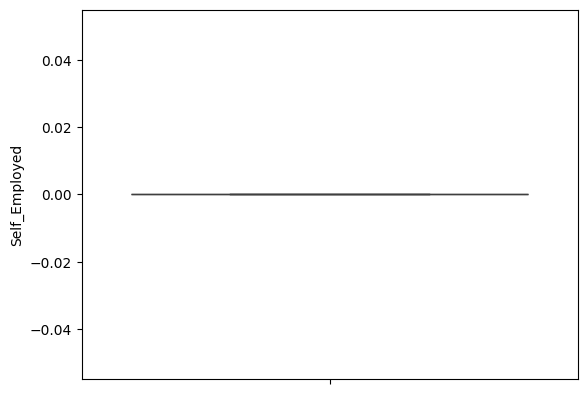

In [358]:
sns.boxplot(data['Self_Employed'])
plt.show()

In [359]:
IQR = data['ApplicantIncome'].quantile(0.75)-data['ApplicantIncome'].quantile(0.25)
IQR

2917.5

In [360]:
lowerBound=data['ApplicantIncome'].quantile(0.25)-(1.5*IQR)
lowerBound

-1498.75

In [361]:
upperBound=data['ApplicantIncome'].quantile(0.75)+(1.5*IQR)
upperBound

10171.25

In [362]:
data['ApplicantIncome']=np.where(data['ApplicantIncome']>upperBound,upperBound,data['ApplicantIncome'])
data['ApplicantIncome']=np.where(data['ApplicantIncome']<lowerBound,lowerBound,data['ApplicantIncome'])

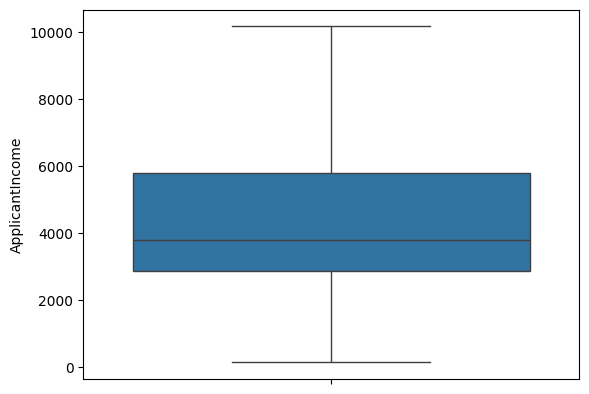

In [363]:
sns.boxplot(data['ApplicantIncome'])
plt.show()

In [364]:
IQR = data['CoapplicantIncome'].quantile(0.75)-data['CoapplicantIncome'].quantile(0.25)
IQR

2297.25

In [365]:
lowerBound=data['CoapplicantIncome'].quantile(0.25)-(1.5*IQR)
lowerBound

-3445.875

In [366]:
upperBound=data['CoapplicantIncome'].quantile(0.75)+(1.5*IQR)
upperBound

5743.125

In [367]:
data['CoapplicantIncome']=np.where(data['CoapplicantIncome']>upperBound,upperBound,data['CoapplicantIncome'])
data['CoapplicantIncome']=np.where(data['CoapplicantIncome']<lowerBound,lowerBound,data['CoapplicantIncome'])

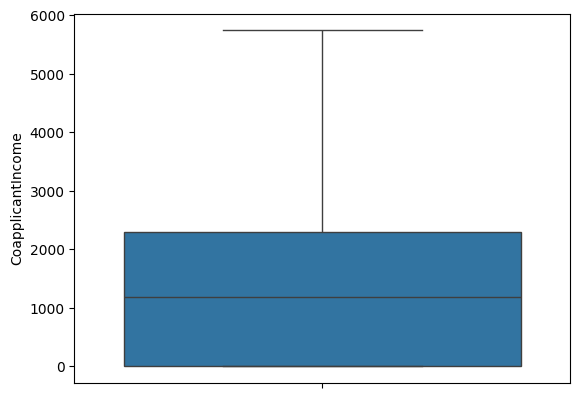

In [368]:
sns.boxplot(data['CoapplicantIncome'])
plt.show()

In [369]:
IQR = data['LoanAmount'].quantile(0.75)-data['LoanAmount'].quantile(0.25)
IQR

64.5

In [370]:
lowerBound=data['LoanAmount'].quantile(0.25)-(1.5*IQR)
lowerBound

3.5

In [371]:
upperBound=data['LoanAmount'].quantile(0.75)+(1.5*IQR)
upperBound

261.5

In [372]:
data['LoanAmount']=np.where(data['LoanAmount']>upperBound,upperBound,data['LoanAmount'])
data['LoanAmount']=np.where(data['LoanAmount']<lowerBound,lowerBound,data['LoanAmount'])

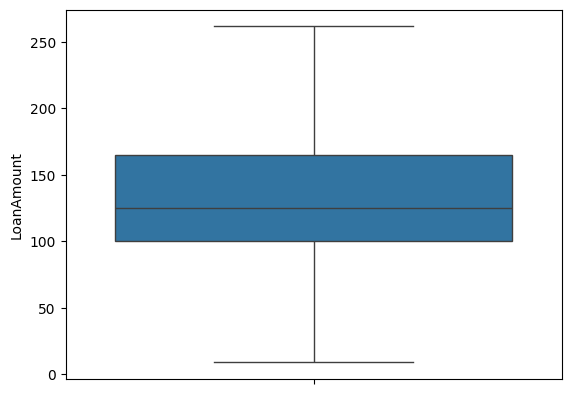

In [373]:
sns.boxplot(data['LoanAmount'])
plt.show()

In [374]:
IQR = data['Loan_Amount_Term'].quantile(0.75)-data['Loan_Amount_Term'].quantile(0.25)
IQR

0.0

In [375]:
lowerBound=data['Loan_Amount_Term'].quantile(0.25)-(1.5*IQR)
lowerBound

360.0

In [376]:
upperBound=data['Loan_Amount_Term'].quantile(0.75)+(1.5*IQR)
upperBound

360.0

In [377]:
data['Loan_Amount_Term']=np.where(data['Loan_Amount_Term']>upperBound,upperBound,data['Loan_Amount_Term'])
data['Loan_Amount_Term']=np.where(data['Loan_Amount_Term']<lowerBound,lowerBound,data['Loan_Amount_Term'])

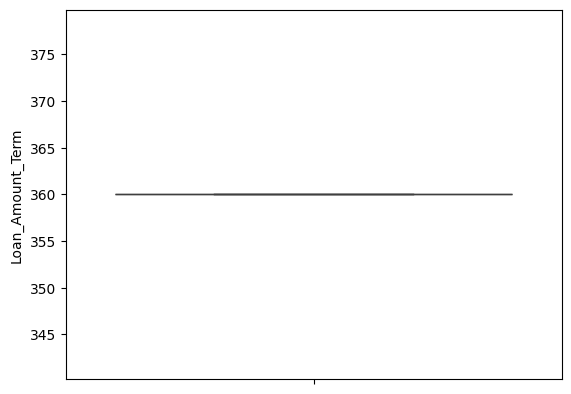

In [378]:
sns.boxplot(data['Loan_Amount_Term'])
plt.show()


In [379]:
IQR = data['Credit_History'].quantile(0.75)-data['Credit_History'].quantile(0.25)
IQR

0.0

In [380]:
lowerBound=data['Credit_History'].quantile(0.25)-(1.5*IQR)
lowerBound

1.0

In [381]:
upperBound=data['Credit_History'].quantile(0.75)+(1.5*IQR)
upperBound

1.0

In [382]:
data['LCredit_History']=np.where(data['Credit_History']>upperBound,upperBound,data['Credit_History'])
data['Credit_History']=np.where(data['Credit_History']<lowerBound,lowerBound,data['Credit_History'])

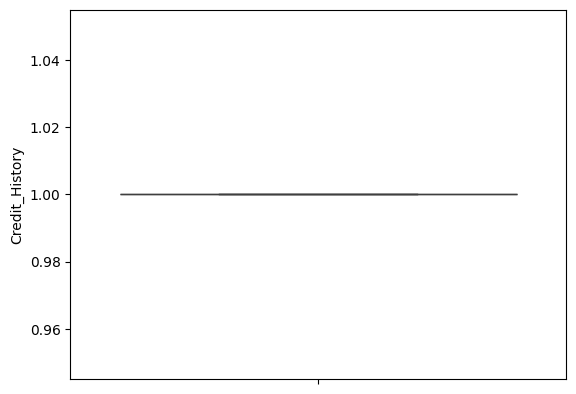

In [383]:
sns.boxplot(data['Credit_History'])
plt.show()

In [384]:
data.drop('LCredit_History',axis=1,inplace=True)

**Exploratory** **Data** **Analysis**


In [385]:
data.describe()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.0,614.000000,614.0,614.0,614.000000,614.000000,614.000000,614.0,614.0,614.000000,614.000000
mean,1999.785016,0.0,0.653094,1.0,0.0,4617.111564,1419.700733,137.078990,360.0,1.0,1.037459,0.687296
std,567.097644,0.0,0.476373,0.0,0.0,2479.851729,1624.606410,55.847766,0.0,0.0,0.787482,0.463973
min,1002.000000,0.0,0.000000,1.0,0.0,150.000000,0.000000,9.000000,360.0,1.0,0.000000,0.000000
25%,1532.750000,0.0,0.000000,1.0,0.0,2877.500000,0.000000,100.250000,360.0,1.0,0.000000,0.000000
50%,1993.500000,0.0,1.000000,1.0,0.0,3812.500000,1188.500000,125.000000,360.0,1.0,1.000000,1.000000
75%,2476.750000,0.0,1.000000,1.0,0.0,5795.000000,2297.250000,164.750000,360.0,1.0,2.000000,1.000000
max,2990.000000,0.0,1.000000,1.0,0.0,10171.250000,5743.125000,261.500000,360.0,1.0,2.000000,1.000000


**DATA** **VISUALIZATION**

<ipython-input-386-5801c05c6a75>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ApplicantIncome'],color='r')
<ipython-input-386-5801c05c6a75>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Credit_History'])
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: Us

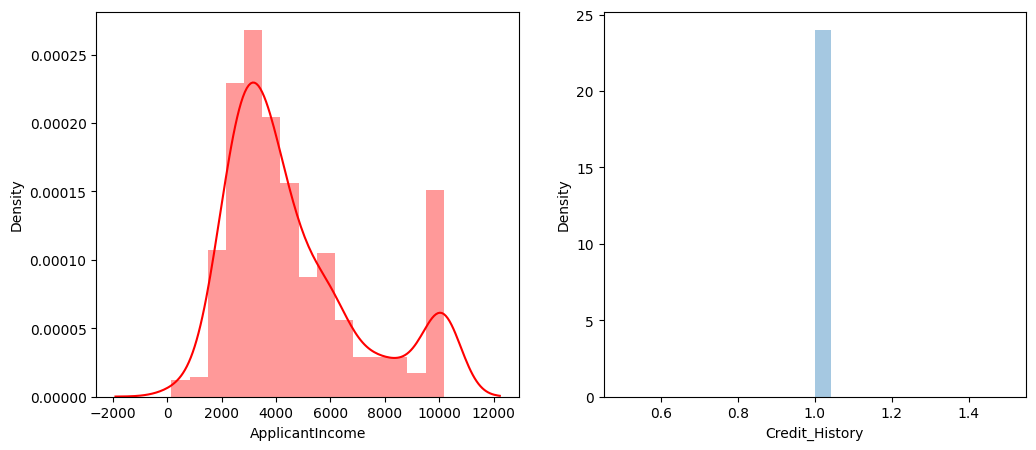

In [386]:
#plotting the using distplot - uni variate analysis
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data['ApplicantIncome'],color='r')
plt.subplot(122)
sns.distplot(data['Credit_History'])
plt.show()

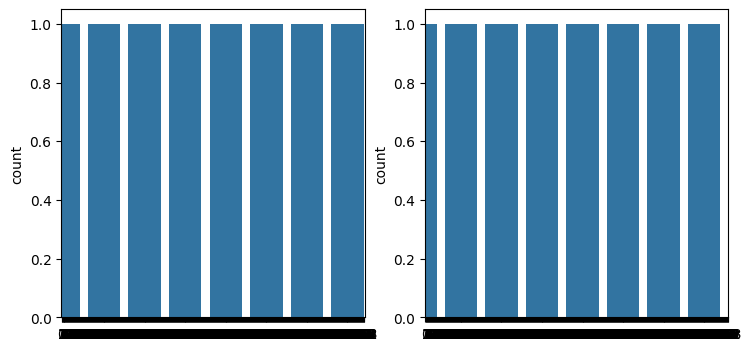

In [387]:
#plotting the count plot - bi variant analysis
plt.figure(figsize=(18,4))
plt.subplot(1,4,1)
sns.countplot(data['Gender'])
plt.subplot(1,4,2)
sns.countplot(data['Education'])
plt.show()

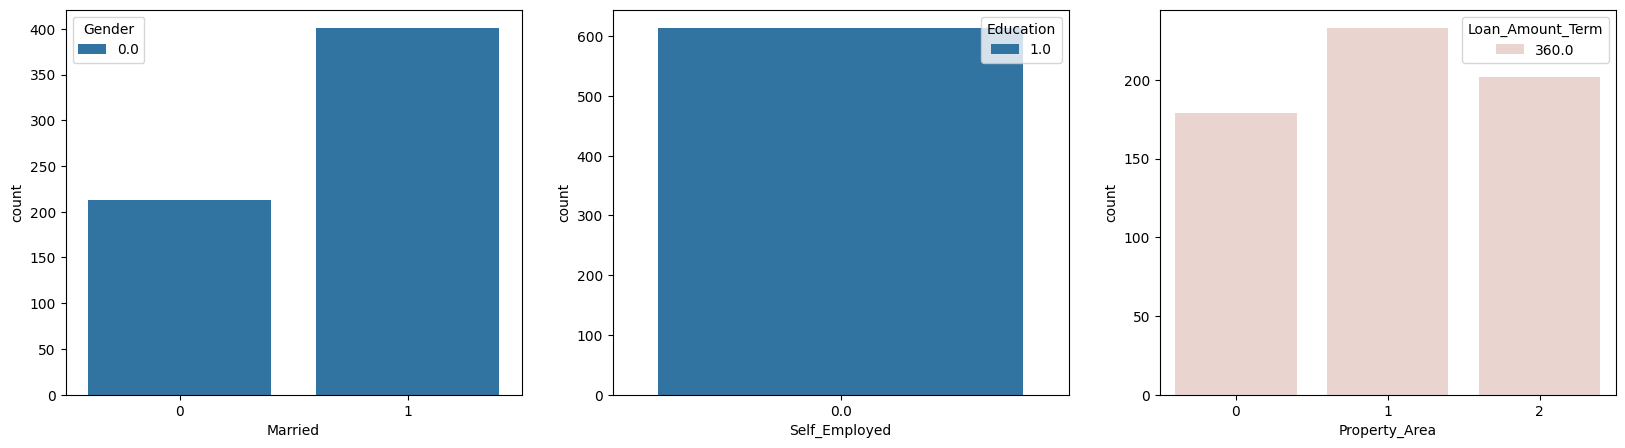

In [388]:
#visualizing  two columns against each other
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(x='Married',hue='Gender',data=data)
plt.subplot(132)
sns.countplot(x='Self_Employed',hue='Education',data=data)
plt.subplot(133)
sns.countplot(x='Property_Area',hue='Loan_Amount_Term',data=data)
plt.show()

<Axes: xlabel='Gender', ylabel='ApplicantIncome'>

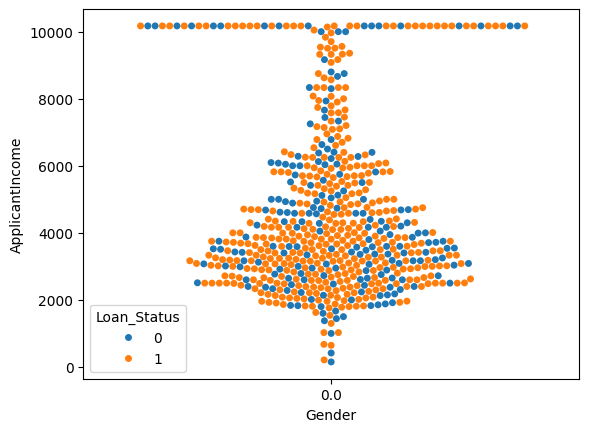

In [389]:
#visualized based gender and incomewhat would be the applicantion status - multivariant analysis
sns.swarmplot(x=data['Gender'],y=data['ApplicantIncome'],hue=data['Loan_Status'])

In [390]:
#Balancing the dataset by using smote
from imblearn.combine import SMOTETomek

In [391]:
smote=SMOTETomek(sampling_strategy=0.90)

In [392]:
# Assuming 'data' is your pandas DataFrame
x = data.drop('Loan_Status', axis=1)  # Replace 'Loan_Status' with your target variable column name
y = data['Loan_Status']



In [393]:
x.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1002,0.0,0,0,1.0,0.0,5849.0,0.0,120.0,360.0,1.0,2
1,1003,0.0,1,1,1.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0
2,1005,0.0,1,0,1.0,0.0,3000.0,0.0,66.0,360.0,1.0,2
3,1006,0.0,1,0,1.0,0.0,2583.0,2358.0,120.0,360.0,1.0,2
4,1008,0.0,0,0,1.0,0.0,6000.0,0.0,141.0,360.0,1.0,2


In [394]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [395]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')
x_bal,y_bal=smote.fit_resample(x.select_dtypes(include='number'),y) # Select only numerical columns

In [396]:
#printing the valuesof y before balancing the data and after
print(y.value_counts())
print(y_bal.value_counts())

Loan_Status
1    422
0    192
Name: count, dtype: int64
Loan_Status
1    346
0    303
Name: count, dtype: int64


In [397]:
data.describe()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.0,614.000000,614.0,614.0,614.000000,614.000000,614.000000,614.0,614.0,614.000000,614.000000
mean,1999.785016,0.0,0.653094,1.0,0.0,4617.111564,1419.700733,137.078990,360.0,1.0,1.037459,0.687296
std,567.097644,0.0,0.476373,0.0,0.0,2479.851729,1624.606410,55.847766,0.0,0.0,0.787482,0.463973
min,1002.000000,0.0,0.000000,1.0,0.0,150.000000,0.000000,9.000000,360.0,1.0,0.000000,0.000000
25%,1532.750000,0.0,0.000000,1.0,0.0,2877.500000,0.000000,100.250000,360.0,1.0,0.000000,0.000000
50%,1993.500000,0.0,1.000000,1.0,0.0,3812.500000,1188.500000,125.000000,360.0,1.0,1.000000,1.000000
75%,2476.750000,0.0,1.000000,1.0,0.0,5795.000000,2297.250000,164.750000,360.0,1.0,2.000000,1.000000
max,2990.000000,0.0,1.000000,1.0,0.0,10171.250000,5743.125000,261.500000,360.0,1.0,2.000000,1.000000


In [398]:
#performing features scaling operation using standard scaler on x part of the dataset
#there differenet types of values in the columns
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_bal=sc.fit_transform(x_bal)

In [399]:
# Get column names from the original DataFrame 'x' before scaling
names = x.select_dtypes(include='number').columns

x_bal=pd.DataFrame(x_bal,columns=names)

In [400]:
#splitting the dataset into train and test on balanced dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_bal,y_bal,test_size=0.33,random_state=42)



In [401]:
X_train.shape

(434, 11)

In [402]:
X_train.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
521,-0.348916,0.0,-1.211479,0.0,0.0,0.552339,1.922456,1.789762,0.0,0.0,-1.199246
178,-0.439869,0.0,0.825438,0.0,0.0,-0.217370,0.168332,-0.374398,0.0,0.0,0.076673
260,0.137951,0.0,0.825438,0.0,0.0,1.623489,2.211460,2.211964,0.0,0.0,-1.199246
153,-0.611075,0.0,0.825438,0.0,0.0,1.885170,-0.905780,0.905451,0.0,0.0,-1.199246
75,-1.201379,0.0,0.825438,0.0,0.0,-0.632818,0.908387,-0.107763,0.0,0.0,0.076673


In [403]:
X_test.shape

(215, 11)

In [404]:
X_test.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
636,-1.590159,0.0,0.825438,0.0,0.0,0.137651,-0.905780,-0.152412,0.0,0.0,-1.199246
220,-0.147393,0.0,0.825438,0.0,0.0,2.218498,-0.905780,2.211964,0.0,0.0,0.076673
594,-0.511205,0.0,-1.211479,0.0,0.0,-0.450946,-0.905780,-0.176721,0.0,0.0,0.076673
429,1.339959,0.0,0.825438,0.0,0.0,0.019408,0.873981,0.052218,0.0,0.0,0.076673
72,-1.262014,0.0,0.825438,0.0,0.0,-0.813860,0.419188,-0.587707,0.0,0.0,0.076673


In [405]:
Y_train.head()

521    0
178    1
260    0
153    1
75     1
Name: Loan_Status, dtype: int64

In [406]:
Y_test.head()

636    0
220    1
594    0
429    1
72     1
Name: Loan_Status, dtype: int64

*MODEL* *BUILDING*

In [407]:
#decision tree model
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
def DecisionTree(X_train,X_test,Y_train,Y_test):
    # Indent the code within the function
    dt=DecisionTreeClassifier()
    dt.fit(X_train,Y_train)
    yPred=dt.predict(X_test)
    acc=accuracy_score(yPred,Y_test)
    yPred_train = dt.predict(X_train)
    acc1=accuracy_score(yPred_train,Y_train)
    print('***DecisionTreeClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(Y_test,yPred))
    print('Classification report')
    print(classification_report(Y_test,yPred))
    print('Accuracy Score of testing: ', acc)
    print('Accuracy Score of training: ', acc1)

In [408]:
#printing the train accuracy and test accuracy respectively
DecisionTree(X_train,X_test,Y_train,Y_test)


***DecisionTreeClassifier***
Confusion matrix
[[63 38]
 [38 76]]
Classification report
              precision    recall  f1-score   support

           0       0.62      0.62      0.62       101
           1       0.67      0.67      0.67       114

    accuracy                           0.65       215
   macro avg       0.65      0.65      0.65       215
weighted avg       0.65      0.65      0.65       215

Accuracy Score of testing:  0.6465116279069767
Accuracy Score of training:  1.0


In [409]:
#Random forest model
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report # Import necessary functions
def RandomForest(X_train,X_test,Y_train,Y_test):
  rf=RandomForestClassifier()
  rf.fit(X_train,Y_train)
  yPred=rf.predict(X_test)
  acc=accuracy_score(yPred,Y_test)
  yPred_train = rf.predict(X_train)
  acc1=accuracy_score(yPred_train,Y_train)
  print('***RandomForestClassifier***')
  print('Confusion matrix')
  print(confusion_matrix(Y_test,yPred))
  print('Classification report')
  print(classification_report(Y_test,yPred))
  print('Accuracy Score of testing: ', acc)
  print('Accuracy Score of training: ', acc1)



In [410]:
#printing the train accuracy and test accuracy respectively
RandomForest(X_train,X_test,Y_train,Y_test)

***RandomForestClassifier***
Confusion matrix
[[63 38]
 [28 86]]
Classification report
              precision    recall  f1-score   support

           0       0.69      0.62      0.66       101
           1       0.69      0.75      0.72       114

    accuracy                           0.69       215
   macro avg       0.69      0.69      0.69       215
weighted avg       0.69      0.69      0.69       215

Accuracy Score of testing:  0.6930232558139535
Accuracy Score of training:  1.0


In [411]:
#KNN model
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
def KNN(X_train,X_test,Y_train,Y_test):
  knn=KNeighborsClassifier()
  knn.fit(X_train,Y_train)
  yPred=knn.predict(X_test)
  acc=accuracy_score(yPred,Y_test)
  yPred_train = knn.predict(X_train)
  acc1=accuracy_score(yPred_train,Y_train)
  print('***KNeighborsClassifier***')
  print('Confusion matrix')
  print(confusion_matrix(Y_test,yPred))
  print('Classification report')
  print(classification_report(Y_test,yPred))
  print('Accuracy Score of testing: ', acc)
  print('Accuracy Score of training: ', acc1)

In [412]:
#printing the train accuracy and test accuracy respectively
KNN(X_train,X_test,Y_train,Y_test)

***KNeighborsClassifier***
Confusion matrix
[[68 33]
 [41 73]]
Classification report
              precision    recall  f1-score   support

           0       0.62      0.67      0.65       101
           1       0.69      0.64      0.66       114

    accuracy                           0.66       215
   macro avg       0.66      0.66      0.66       215
weighted avg       0.66      0.66      0.66       215

Accuracy Score of testing:  0.6558139534883721
Accuracy Score of training:  0.7511520737327189


In [413]:
#xgboost model
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
def xgboost(X_train,X_test,Y_train,Y_test):
  xg=GradientBoostingClassifier()
  xg.fit(X_train,Y_train)
  yPred=xg.predict(X_test)
  acc=accuracy_score(yPred,Y_test)
  yPred_train = xg.predict(X_train)
  acc1=accuracy_score(yPred_train,Y_train)
  print('***GradientBoostingClassifier***')
  print('Confusion matrix')
  print(confusion_matrix(Y_test,yPred))
  print('Classification report')
  print(classification_report(Y_test,yPred))
  print('Accuracy Score of testing: ', acc)
  print('Accuracy Score of training: ', acc1)

In [414]:
#printing the train accuracy and test accuracy respectively
xgboost(X_train,X_test,Y_train,Y_test)

***GradientBoostingClassifier***
Confusion matrix
[[72 29]
 [37 77]]
Classification report
              precision    recall  f1-score   support

           0       0.66      0.71      0.69       101
           1       0.73      0.68      0.70       114

    accuracy                           0.69       215
   macro avg       0.69      0.69      0.69       215
weighted avg       0.70      0.69      0.69       215

Accuracy Score of testing:  0.6930232558139535
Accuracy Score of training:  0.9216589861751152


In [415]:
#EVALUATING PERFORMANCE OF THE MODEL AND SAVING THE MODEL
from sklearn.model_selection import cross_val_score

In [416]:
#random forest model is selected
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
yPred=rf.predict(X_test)

In [417]:
# Use the fitted model 'rf' to predict on new data
rf.predict([[1002,0,0,0,1,0,5849,0,120,360,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [418]:
rf.predict([[1003,0,1,1,1,0,4583,1508,128,360,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [419]:
rf.predict([[1005,0,1,0,1,1,3000,0,66,360,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [420]:
rf.predict([[1006,0,1,0,0,0,2583,2358,120,360,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [421]:
rf.predict([[1008,0,0,0,1,0,6000,0,141,360,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [422]:
f1_score(yPred,Y_test,average='weighted')

0.6698678840993569

In [423]:
# Assuming 'x' is a pandas DataFrame, try converting relevant columns to numeric type
x_numeric = x.apply(pd.to_numeric, errors='coerce')

# Fill any missing values resulting from the conversion (if needed)
x_numeric = x_numeric.fillna(0)  # Or any other suitable filling strategy

# Perform cross-validation with the numeric data
cv = cross_val_score(rf, x_numeric, y, cv=5)

In [424]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

# Assuming 'x' is your DataFrame with features and 'y' is your target variable Series
# Identify columns with string values in 'x'
object_cols = x.select_dtypes(include=['object']).columns

# Apply Label Encoding to convert string to numerical
label_encoder = LabelEncoder()
for col in object_cols:
    x[col] = label_encoder.fit_transform(x[col])

# Now try cross-validation again
cv = cross_val_score(rf, x, y, cv=5)

print(cv)


[0.64227642 0.67479675 0.67479675 0.63414634 0.54918033]


In [425]:
np.mean(cv)

0.6350393176062908

In [426]:
#importing pickle
import joblib

In [427]:
with open('loanXG.pkl','wb') as f:
  joblib.dump(data,f)

In [428]:
with open('loanXG.pkl','rb') as f:
  xgboost=joblib.load(f)

In [429]:
with open('scalerx.pkl','wb') as f:
  joblib.dump(data,f)

In [430]:
with open('scalerx.pkl','rb') as f:
  scaler=joblib.load(f)